# 1 - Problema Inicial para PCA

Reduzir a dimensionalidade do dataset Iris de 4 features para 2 componentes principais.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configurar estilo do Seaborn para plots mais bonitos
sns.set(style='whitegrid', context='notebook', palette='viridis')
plt.rcParams['figure.figsize'] = (10, 6)

# 2 - Análise Exploratória

In [15]:
# Carregar dados
data = load_iris()
X = data.data
y = data.target

# DataFrame para análise
df = pd.DataFrame(X, columns=data.feature_names)
df['species'] = [data.target_names[i] for i in y]

print(f"Dimensões: {df.shape}")

print("Explorando o df gerado:")
display(df.head())


Dimensões: (150, 5)
Explorando o df gerado:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# Estatísticas por espécie
display(df.groupby('species').mean())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Aqui temos a media de cada uma das variaveis por especie, isso ajuda a conhecer melhor os dados

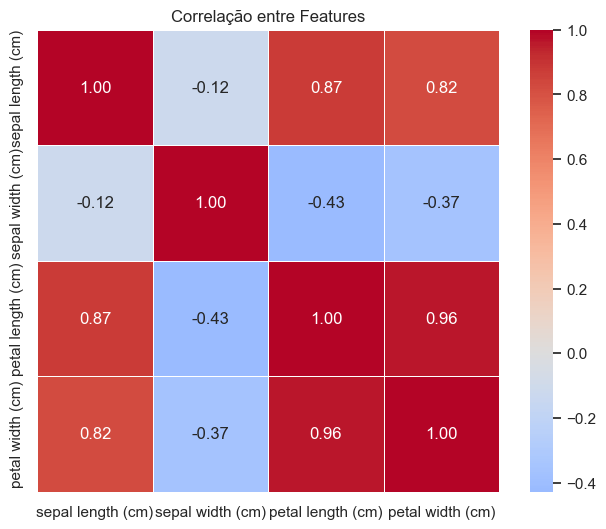

In [3]:
# Matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f', linewidths=.5)
plt.title('Correlação entre Features')
plt.show()

**Hipótese Inicial a partir do Heatmap**: Como 3 das 4 variáveis (Sepal Length, Petal Length, Petal Width) estão "gritando" a mesma coisa (são altamente correlacionadas), o PCA conseguirá condensar toda essa informação repetida em um único Componente Principal (PC1) muito forte.

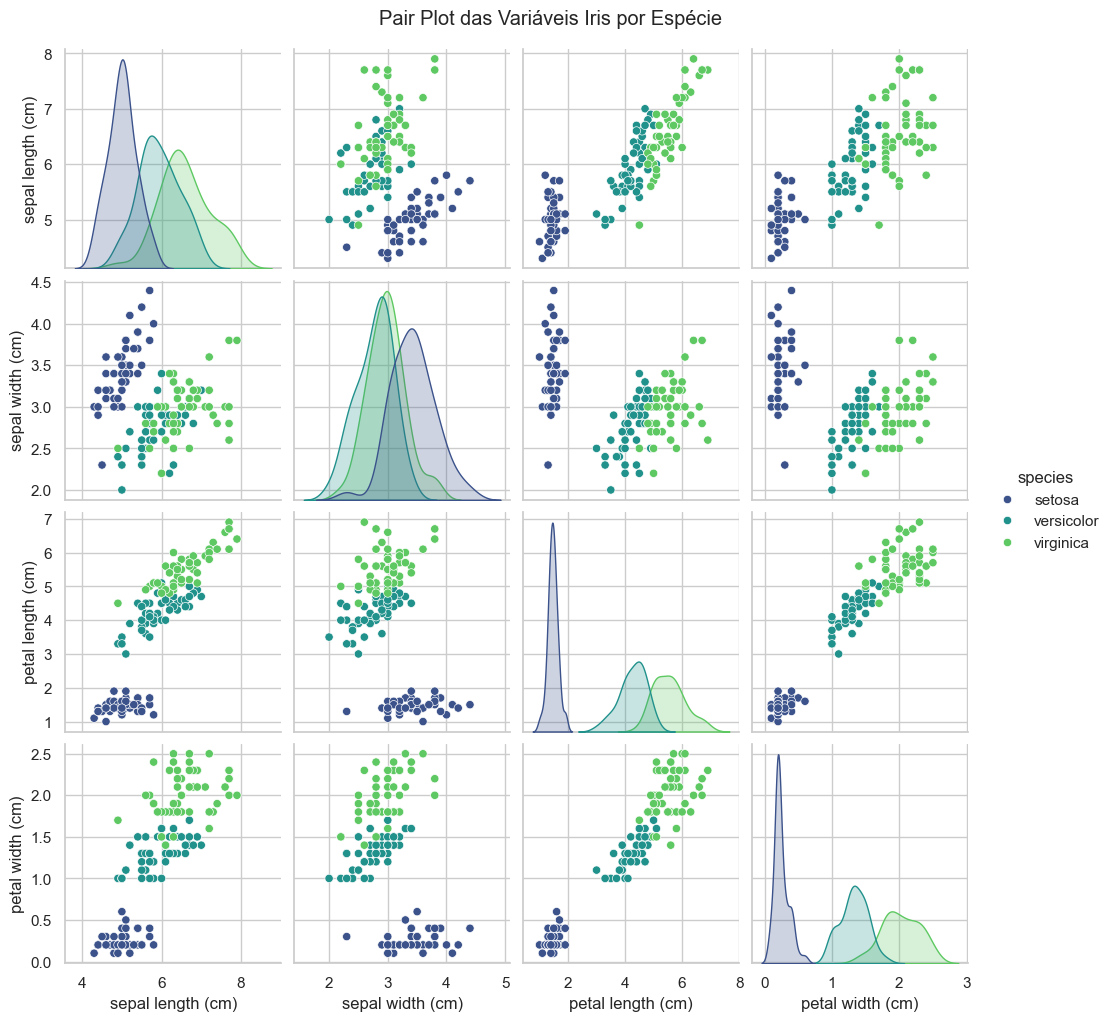

In [4]:
# Pairplot simplificado
sns.pairplot(df, hue='species', palette='viridis', height=2.5)
plt.suptitle('Pair Plot das Variáveis Iris por Espécie', y=1.02)
plt.show()

**Interpretação do Pairplot:**
* **Setosa Exclusiva:** Totalmente separada e fácil de identificar.
* **Sobreposição:** Versicolor e Virginica se misturam, dificultando a distinção.
* **Pétalas são Chave:** Variáveis de pétala separam melhor as flores que as de sépala.
* **Redundância:** A forte correlação linear entre comprimento e largura da pétala confirma que o PCA reduzirá essa redundância.

# 3 - Aplicação do PCA

## Padronização dos Dados
O PCA é sensível à escala, então padronizamos para média 0 e desvio padrão 1.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# PCA com todas as componentes para análise de variância
pca_full = PCA()
pca_full.fit(X_scaled)

# Variância explicada
exp_var_pct = pca_full.explained_variance_ratio_ * 100
cum_var_pct = np.cumsum(exp_var_pct)

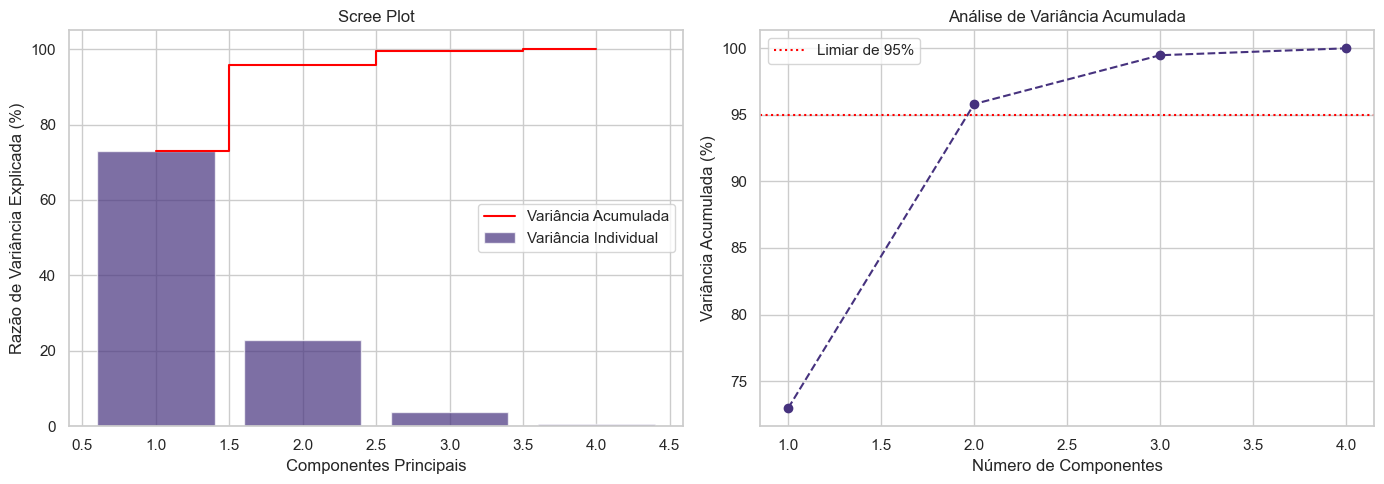

Variância explicada por componente: [72.96 22.85  3.67  0.52]
Variância acumulada: [ 72.96  95.81  99.48 100.  ]


In [7]:
# Plot Scree e Variância Acumulada
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Scree Plot
ax[0].bar(range(1, len(exp_var_pct) + 1), exp_var_pct, alpha=0.7, label='Variância Individual')
ax[0].step(range(1, len(exp_var_pct) + 1), cum_var_pct, where='mid', label='Variância Acumulada', color='red')
ax[0].set_ylabel('Razão de Variância Explicada (%)')
ax[0].set_xlabel('Componentes Principais')
ax[0].set_title('Scree Plot')
ax[0].legend()

# Variância Acumulada
ax[1].plot(range(1, len(cum_var_pct) + 1), cum_var_pct, marker='o', linestyle='--')
ax[1].axhline(y=95, color='r', linestyle=':', label='Limiar de 95%')
ax[1].set_xlabel('Número de Componentes')
ax[1].set_ylabel('Variância Acumulada (%)')
ax[1].set_title('Análise de Variância Acumulada')
ax[1].legend()

plt.tight_layout()
plt.show()

print(f"Variância explicada por componente: {exp_var_pct.round(2)}")
print(f"Variância acumulada: {cum_var_pct.round(2)}")

A variância por componente nos diz que os dois primeiros componenetes, se somar o 72.96 com 22.85, explica 95.81% dos dados. Aqui a acumulada é simplesmente a soma progressiva da variância. É ela que dá a segurança para dizer que posso parar no PC2 e jogar o resto fora, pois já tenho 96% do que importa (PC1 = 73%, PC2 = 96% aproximadamente)

 O **"Cotovelo" (Elbow):** A curva "quebra" drasticamente após o PC2. Isso indica que adicionar o PC3 ou PC4 traria pouco ganho de informação real (apenas ruído).

In [8]:
# PCA Final com 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Variância explicada: {pca.explained_variance_ratio_.sum()*100:.2f}%")

Variância explicada: 95.81%


# 5 - Visualização

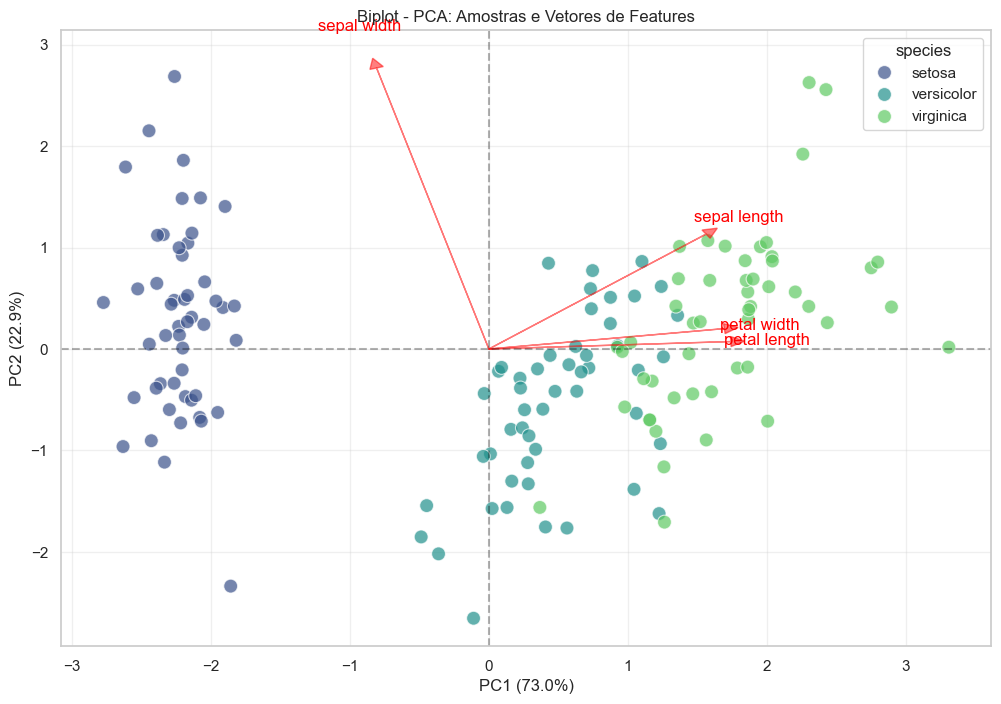

In [9]:
# Biplot simplificado com Seaborn
plt.figure(figsize=(12, 8))

# Scatter plot dos pontos PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['species'], palette='viridis', s=100, alpha=0.7)

# Vetores das features (Loadings)
# O scaling factor (3) é usado para visibilidade dos vetores
loadings = pca.components_.T
scale_factor = 3

for i, feature in enumerate(data.feature_names):
    plt.arrow(0, 0, loadings[i, 0]*scale_factor, loadings[i, 1]*scale_factor, 
              color='red', alpha=0.5, head_width=0.1, head_length=0.1)
    plt.text(loadings[i, 0]*scale_factor*1.15, loadings[i, 1]*scale_factor*1.15, 
             feature.replace(' (cm)', ''), color='red', ha='center', va='center', fontsize=12)

plt.xlabel(f'PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_full.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Biplot - PCA: Amostras e Vetores de Features')
plt.grid(True, alpha=0.3)
plt.axhline(0, color='black', linestyle='--', alpha=0.3)
plt.axvline(0, color='black', linestyle='--', alpha=0.3)
plt.show()

**Interpretação do Biplot**: 
1. **Pontos (Flores)**: As espécies estão bem separadas. Setosa à esquerda, Versicolor no meio, Virginica à direita.
2. **Setas (Features)**: 
    - As setas de *Petal Length*, *Petal Width* e *Sepal Length* apontam para a direita (PC1 positivo). Flores "maiores" nessas medidas (Virginicas) ficam à direita.
    - A seta de *Sepal Width* aponta para cima/esquerda (PC2 positivo). Flores mais "gordinhas" e curtas (Setosas) tendem a ficar nessa direção.

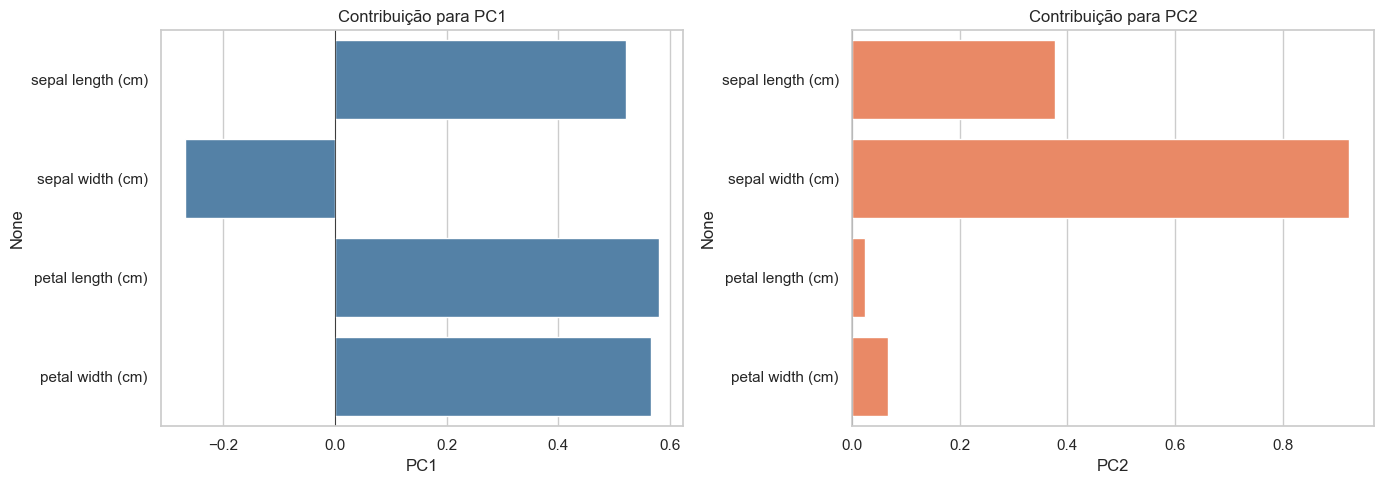

In [10]:
# Loadings em Gráfico de Barras
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=data.feature_names)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=loadings_df['PC1'], y=loadings_df.index, ax=ax[0], color='steelblue')
ax[0].set_title('Contribuição para PC1')
ax[0].axvline(0, color='k', linewidth=0.5)

sns.barplot(x=loadings_df['PC2'], y=loadings_df.index, ax=ax[1], color='coral')
ax[1].set_title('Contribuição para PC2')
ax[1].axvline(0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

**PC1 é o "Tamanho Geral"**: Contém Petal Len, Petal Width e Sepal Len.
**PC2 é a "Largura da Sépala"**: Dominado quase exclusivamente por Sepal Width.

# 6 - Métricas de Qualidade

In [11]:
# Reconstrução e Erro
X_reconstructed = pca.inverse_transform(X_pca)
mse = np.mean((X_scaled - X_reconstructed) ** 2)

print(f"Erro de reconstrução (MSE): {mse:.6f}")
print(f"Perda de informação: {(1 - pca.explained_variance_ratio_.sum())*100:.2f}%")

Erro de reconstrução (MSE): 0.041868
Perda de informação: 4.19%


In [12]:
# Tabela Resumo
summary = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(4)],
    'Variância (%)': pca_full.explained_variance_ratio_ * 100,
    'Acumulada (%)': np.cumsum(pca_full.explained_variance_ratio_) * 100
})

display(summary)
print(f"\nRedução: 4 → 2 features (50%)")
print(f"Informação preservada: {pca.explained_variance_ratio_.sum()*100:.2f}%")

,Componente,Variância (%),Acumulada (%)
0,PC1,72.962445,72.962445
1,PC2,22.850762,95.813207
2,PC3,3.668922,99.482129
3,PC4,0.517871,100.000000



Redução: 4 → 2 features (50%)
Informação preservada: 95.81%


Conseguimos reduzir 50% das features (de 4 para 2) mantendo quase 96% da informação original. Um excelente trade-off para visualização e simplificação do modelo.